https://www.overleaf.com/5126168723yhzsgwxnhhvf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
! wget https://raw.githubusercontent.com/steven15283/4300/master/carData.csv
data = pd.read_csv('carData.csv', delimiter= ',')

--2021-04-27 04:07:15--  https://raw.githubusercontent.com/steven15283/4300/master/carData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24250 (24K) [text/plain]
Saving to: ‘carData.csv’

carData.csv         100%[===================>]  23.68K  --.-KB/s    in 0s      

2021-04-27 04:07:16 (103 MB/s) - ‘carData.csv’ saved [24250/24250]



In [ ]:
dataset = np.genfromtxt('carData.csv', delimiter= ',', skip_header=True)

In [ ]:
print(dataset)

[[3. 3. 2. ... 0. 0. 0.]
 [3. 3. 2. ... 0. 1. 0.]
 [3. 3. 2. ... 0. 2. 0.]
 ...
 [0. 0. 5. ... 2. 0. 0.]
 [0. 0. 5. ... 2. 1. 2.]
 [0. 0. 5. ... 2. 2. 3.]]


In [ ]:
dataset[dataset[:, -1] > 0, -1] = 1

In [ ]:
print(dataset)

[[3. 3. 2. ... 0. 0. 0.]
 [3. 3. 2. ... 0. 1. 0.]
 [3. 3. 2. ... 0. 2. 0.]
 ...
 [0. 0. 5. ... 2. 0. 0.]
 [0. 0. 5. ... 2. 1. 1.]
 [0. 0. 5. ... 2. 2. 1.]]


In [ ]:
X = dataset[:, :-1]
Y = dataset[:, -1]

In [ ]:
print(X.shape, Y.shape)


(1728, 6) (1728,)


In [ ]:
print(Y)
print(X)

[0. 0. 0. ... 0. 1. 1.]
[[3. 3. 2. 2. 0. 0.]
 [3. 3. 2. 2. 0. 1.]
 [3. 3. 2. 2. 0. 2.]
 ...
 [0. 0. 5. 5. 2. 0.]
 [0. 0. 5. 5. 2. 1.]
 [0. 0. 5. 5. 2. 2.]]


In [ ]:
plt.hist(dataset[:,0])
plt.title("Histogram of price rating")
price_rating_mean = np.mean(dataset[:,0])
price_rating_median = np.median(dataset[:,0])
price_rating_max = np.max(dataset[:,0])
price_rating_min = np.min(dataset[:,0])

print(price_rating_mean, price_rating_median, price_rating_max, price_rating_min)

In [ ]:
plt.hist(dataset[:,1])
plt.title("Histogram of maintenance rating")
maintenance_rating_mean = np.mean(dataset[:,1])
maintenance_rating_median = np.median(dataset[:,1])
maintenance_rating_max = np.max(dataset[:,1])
maintenance_rating_min = np.min(dataset[:,1])

print(maintenance_rating_mean, maintenance_rating_median, maintenance_rating_max, maintenance_rating_min)

In [ ]:
plt.hist(dataset[:,2])
plt.title("Histogram of how many doors")
door_mean = np.mean(dataset[:,2])
door_median = np.median(dataset[:,2])
door_max = np.max(dataset[:,2])
door_min = np.min(dataset[:,2])

print(door_mean, door_median, door_max, door_min)

In [ ]:
plt.hist(dataset[:,3])
plt.title("Histogram of how many people can fit")
passenger_number_mean = np.mean(dataset[:,3])
passenger_number_median = np.median(dataset[:,3])
passenger_number_max = np.max(dataset[:,3])
passenger_number_min = np.min(dataset[:,3])

print(passenger_number_mean, passenger_number_median, passenger_number_max, passenger_number_min)

In [ ]:
plt.hist(dataset[:,4])
plt.title("Histogram of lug boot capacity rating")
lug_boot_capacity_rating_mean = np.mean(dataset[:,4])
lug_boot_capacity_rating_median = np.median(dataset[:,4])
lug_boot_capacity_rating_max = np.max(dataset[:,4])
lug_boot_capacity_rating_min = np.min(dataset[:,4])

print(lug_boot_capacity_rating_mean, lug_boot_capacity_rating_median, lug_boot_capacity_rating_max, lug_boot_capacity_rating_min)

In [ ]:
plt.hist(dataset[:,5])
plt.title("Histogram of safety rating")
safety_rating_mean = np.mean(dataset[:,5])
safety_rating_median = np.median(dataset[:,5])
safety_rating_max = np.max(dataset[:,5])
safety_rating_min = np.min(dataset[:,5])

print(safety_rating_mean, safety_rating_median, safety_rating_max, safety_rating_min)

In [ ]:
plt.hist(dataset[:,6])
plt.title("acceptibility of car")
acceptibility_mean = np.mean(dataset[:,6])
acceptibility_median = np.median(dataset[:,6])
acceptibility_max = np.max(dataset[:,6])
acceptibility_min = np.min(dataset[:,6])

print(acceptibility_mean, acceptibility_median, acceptibility_max, acceptibility_min)

In [ ]:
data['value'].value_counts()

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
model.fit(dataset[:,0], dataset[:, 1], epochs = 64, batch_size = 32, verbose =0)
predictions = model.predict(dataset[:, 0])
print(predictions[:5])
actual_predictions = predictions * fixedAcidity_max
print(actual_predictions)

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim = len(X[0, :]), activation= 'relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X,Y, epochs = 256, verbose = 1 )
prediction = model.predict(X)

In [ ]:
print(prediction)

[[2.6583982e-12]
 [3.3380549e-09]
 [3.9373034e-09]
 ...
 [8.7935150e-02]
 [9.9123722e-01]
 [9.9970722e-01]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y, prediction.round())
precision = precision_score(Y, prediction.round())
recall = recall_score(Y, prediction.round())
f1score = f1_score(Y, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Accuracy: 95.78%
Precision: 91.43%
Recall: 94.79%
F1-score: 0.93


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(prediction[:20])

[[2.6583982e-12]
 [3.3380549e-09]
 [3.9373034e-09]
 [1.3820542e-10]
 [8.7517993e-09]
 [1.8278348e-08]
 [7.1850690e-09]
 [2.2945695e-08]
 [8.9848278e-08]
 [4.4770654e-12]
 [3.5597125e-08]
 [4.0310049e-05]
 [2.5748270e-10]
 [2.0472439e-06]
 [1.1691395e-04]
 [1.4808215e-08]
 [1.0190397e-04]
 [3.3894181e-04]
 [1.7429390e-11]
 [6.3240520e-08]]


In [ ]:
print(Y[:20])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
len(Y)

1728

In [ ]:
# Shuffle the datasets
import random
np.random.shuffle(dataset)
print(dataset.shape)

(1728, 7)


In [ ]:
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)

518


In [ ]:
# Split into training and validation, 30% validation set and 70% training 
XVALID = dataset[:index_30percent, :-1]
YVALID = dataset[:index_30percent, -1]
XTRAIN = dataset[index_30percent:, :-1]
YTRAIN = dataset[index_30percent:, -1]

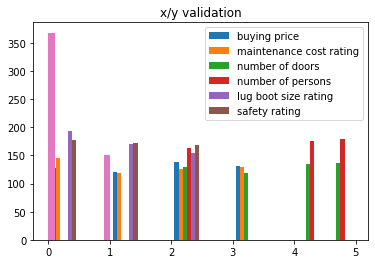

In [ ]:
plt.hist(XVALID)
plt.hist(YVALID)
plt.title("x/y validation")
plt.legend(['buying price', 'maintenance cost rating', 'number of doors', 'number of persons', 'lug boot size rating', 'safety rating'], loc='upper right')

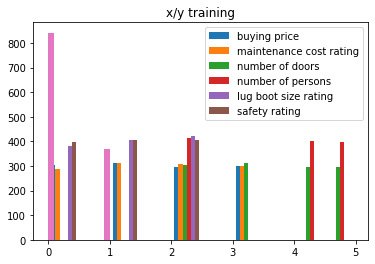

In [ ]:
plt.hist(XTRAIN)
plt.hist(YTRAIN)
plt.title("x/y training")
plt.legend(['buying price', 'maintenance cost rating', 'number of doors', 'number of persons', 'lug boot size rating', 'safety rating'], loc='upper right')

In [ ]:
#accuracy on the validation set linear
model = Sequential()
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'linear')) 
# 1 neuron in the last layer
model.add(Dense(1, activation = 'linear'))
model.summary()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
# Check what's in the history
print(history.params)

# Plot the learning curves (loss/MAE)
plt.plot(history.history['mae']) # replace with accuracy/MAE
plt.plot(history.history['val_mae']) # replace with val_accuracy, etc.
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.title("linear")
plt.show()

print("Training")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round(), average='weighted')
recall = recall_score(YTRAIN, p_training.round(), average='weighted')
f1score = f1_score(YTRAIN, p_training.round(), average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round(), average='weighted')
recall = recall_score(YVALID, p_valid.round(), average='weighted')
f1score = f1_score(YVALID, p_valid.round(), average='weighted')
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
model = Sequential()
# 4 neurons in the first layer
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'relu')) 
# 1 neuron in the last layer
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("1 layer")
plt.show()
print("Training")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round())
recall = recall_score(YTRAIN, p_training.round())
f1score = f1_score(YTRAIN, p_training.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round())
recall = recall_score(YVALID, p_valid.round())
f1score = f1_score(YVALID, p_valid.round())
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
model = Sequential()
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'relu')) 
model.add(Dense(8, activation='relu'))
# 1 neuron in the last layer
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("2 layer")
plt.show()

print("Training")

accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round())
recall = recall_score(YTRAIN, p_training.round())
f1score = f1_score(YTRAIN, p_training.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))


accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round())
recall = recall_score(YVALID, p_valid.round())
f1score = f1_score(YVALID, p_valid.round())
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
model = Sequential()
# 4 neurons in the first layer
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'relu')) 
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
# 1 neuron in the last layer
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("3 layer")
plt.show()

print("Training")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round())
recall = recall_score(YTRAIN, p_training.round())
f1score = f1_score(YTRAIN, p_training.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round())
recall = recall_score(YVALID, p_valid.round())
f1score = f1_score(YVALID, p_valid.round())
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
model = Sequential()
# 4 neurons in the first layer
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'relu')) 
model.add(Dense(12, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(48, activation='relu'))
# 1 neuron in the last layer
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("4 layer")
plt.show()

print("Training")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round())
recall = recall_score(YTRAIN, p_training.round())
f1score = f1_score(YTRAIN, p_training.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round())
recall = recall_score(YVALID, p_valid.round())
f1score = f1_score(YVALID, p_valid.round())
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
#adding more layers
model = Sequential()
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'relu')) 
model.add(Dense(12, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(96, activation='relu'))
# 1 neuron in the last layer
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 256)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("more layers")
plt.show()

print("Training")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round())
recall = recall_score(YTRAIN, p_training.round())
f1score = f1_score(YTRAIN, p_training.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round())
recall = recall_score(YVALID, p_valid.round())
f1score = f1_score(YVALID, p_valid.round())
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
#adding more layers
model = Sequential()
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'relu')) 
model.add(Dense(12, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(192, activation='relu'))
# 1 neuron in the last layer
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 256)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("more layers")
plt.show()

print("Training")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round())
recall = recall_score(YTRAIN, p_training.round())
f1score = f1_score(YTRAIN, p_training.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round())
recall = recall_score(YVALID, p_valid.round())
f1score = f1_score(YVALID, p_valid.round())
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
#adding more layers
model = Sequential()
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'relu')) 
model.add(Dense(12, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(192, activation='relu'))
model.add(Dense(384, activation='relu'))
# 1 neuron in the last layer
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 256)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("more layers")
plt.show()

print("Training")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round())
recall = recall_score(YTRAIN, p_training.round())
f1score = f1_score(YTRAIN, p_training.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round())
recall = recall_score(YVALID, p_valid.round())
f1score = f1_score(YVALID, p_valid.round())
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
#adding more layers
model = Sequential()
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'relu')) 
model.add(Dense(12, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(192, activation='relu'))
model.add(Dense(384, activation='relu'))
model.add(Dense(768, activation='relu'))
# 1 neuron in the last layer
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 256)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("more layers")
plt.show()

print("Training")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round())
recall = recall_score(YTRAIN, p_training.round())
f1score = f1_score(YTRAIN, p_training.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round())
recall = recall_score(YVALID, p_valid.round())
f1score = f1_score(YVALID, p_valid.round())
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
#overfitting
model = Sequential()
model.add(Dense(60, input_dim = len(XTRAIN[0, :]), activation = 'relu')) 
model.add(Dense(120, activation='relu'))
model.add(Dense(240, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(960, activation='relu'))
# 1 neuron in the last layer
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 256)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("overfitting")
plt.show()

print("Training")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round())
recall = recall_score(YTRAIN, p_training.round())
f1score = f1_score(YTRAIN, p_training.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round())
recall = recall_score(YVALID, p_valid.round())
f1score = f1_score(YVALID, p_valid.round())
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
#linear in all layers
model = Sequential()
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'linear')) 
model.add(Dense(12, activation='linear'))
model.add(Dense(24, activation='linear'))
model.add(Dense(48, activation='linear'))
model.add(Dense(96, activation='linear'))
# 1 neuron in the last layer
model.add(Dense(1, activation = 'linear'))
model.summary()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
# Check what's in the history
print(history.params)

# Plot the learning curves (loss/MAE)
plt.plot(history.history['mae']) # replace with accuracy/MAE
plt.plot(history.history['val_mae']) # replace with val_accuracy, etc.
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.title("linear")
plt.show()

print("Training")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round(), average='weighted')
recall = recall_score(YTRAIN, p_training.round(), average='weighted')
f1score = f1_score(YTRAIN, p_training.round(), average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round(), average='weighted')
recall = recall_score(YVALID, p_valid.round(), average='weighted')
f1score = f1_score(YVALID, p_valid.round(), average='weighted')
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
#linear in last layer
model = Sequential()
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'sigmoid')) 
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(24, activation='sigmoid'))
model.add(Dense(48, activation='sigmoid'))
model.add(Dense(96, activation='sigmoid'))
# 1 neuron in the last layer
model.add(Dense(1, activation = 'linear'))
model.summary()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
# Check what's in the history
print(history.params)

# Plot the learning curves (loss/MAE)
plt.plot(history.history['mae']) # replace with accuracy/MAE
plt.plot(history.history['val_mae']) # replace with val_accuracy, etc.
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.title("linear in last layer")
plt.show()

print("Training")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round(), average='weighted')
recall = recall_score(YTRAIN, p_training.round(), average='weighted')
f1score = f1_score(YTRAIN, p_training.round(), average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round(), average='weighted')
recall = recall_score(YVALID, p_valid.round(), average='weighted')
f1score = f1_score(YVALID, p_valid.round(), average='weighted')
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
model = Sequential()
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'sigmoid')) 
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(24, activation='sigmoid'))
model.add(Dense(48, activation='sigmoid'))
model.add(Dense(96, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("sigmoid layers")
plt.show()
print("Training")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round())
recall = recall_score(YTRAIN, p_training.round())
f1score = f1_score(YTRAIN, p_training.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round())
recall = recall_score(YVALID, p_valid.round())
f1score = f1_score(YVALID, p_valid.round())
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
#sigmoid last layer
model = Sequential()
model.add(Dense(6, input_dim = len(XTRAIN[0, :]), activation = 'linear')) 
model.add(Dense(12, activation='linear'))
model.add(Dense(24, activation='linear'))
model.add(Dense(48, activation='linear'))
model.add(Dense(96, activation='linear'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("sigmoid last layer")
plt.show()
print("Training")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round())
recall = recall_score(YTRAIN, p_training.round())
f1score = f1_score(YTRAIN, p_training.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YVALID, p_valid.round())
precision = precision_score(YVALID, p_valid.round())
recall = recall_score(YVALID, p_valid.round())
f1score = f1_score(YVALID, p_valid.round())
print("Validation")
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
model = Sequential()
# 4 neurons in the first layer
model.add(Dense(9999, input_dim = len(XTRAIN[0, :]), activation = 'relu')) 
model.add(Dense(9999, activation='relu'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XVALID)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("denselayers")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, p_training.round())
precision = precision_score(YTRAIN, p_training.round())
recall = recall_score(YTRAIN, p_training.round())
f1score = f1_score(YTRAIN, p_training.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# File name must be in quotes
callback_a = ModelCheckpoint(filepath = 'carData.csv', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256, batch_size=8, callbacks = [callback_a, callback_b])
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("10 patience")
plt.show()

In [ ]:
callback_a = ModelCheckpoint(filepath = 'carData.csv', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256, batch_size=8, callbacks = [callback_a, callback_b])
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("20 patience")
plt.show()

In [ ]:
callback_a = ModelCheckpoint(filepath = 'carData.csv', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
# The patience value can be 10, 20, 100, etc. depending on when your model starts to overfit
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=100, verbose=1)
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs=256, batch_size=8, callbacks = [callback_a, callback_b])
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.title("100 patience")
plt.show()

In [ ]:
dataset[dataset[:, -1] > 0, -1] = 1

In [ ]:
X = dataset[:, :-1]
Y = dataset[:, -1]

In [ ]:
print(X.shape, Y.shape)

(1728, 6) (1728,)


In [ ]:
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = dataset[:index_30percent, :-1]
YVALID = dataset[:index_30percent, -1]
XTRAIN = dataset[index_30percent:, :-1]
YTRAIN = dataset[index_30percent:, -1]

518


In [ ]:
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)

(518, 6)
(518,)
(1210, 6)
(1210,)


In [ ]:
my_new_xt = XTRAIN[:, 0]
my_new_xv = XVALID[:, 0]
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(my_new_xt, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(my_new_xt)
accuracyt = model.evaluate(my_new_xt, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(my_new_xv)
accuracyv = model.evaluate(my_new_xv, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(my_new_xt, YTRAIN, validation_data = (my_new_xv, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(my_new_xt)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy1 = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
my_new_xt = XTRAIN[:, 1]
my_new_xv = XVALID[:, 1]
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(my_new_xt, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(my_new_xt)
accuracyt = model.evaluate(my_new_xt, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(my_new_xt)
accuracyv = model.evaluate(my_new_xv, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(my_new_xt, YTRAIN, validation_data = (my_new_xv, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(my_new_xt)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy2 = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
my_new_xt = XTRAIN[:, 2]
my_new_xv = XVALID[:, 2]
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(my_new_xt, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(my_new_xt)
accuracyt = model.evaluate(my_new_xt, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(my_new_xt)
accuracyv = model.evaluate(my_new_xv, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(my_new_xt, YTRAIN, validation_data = (my_new_xv, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(my_new_xt)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy3 = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy3 * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
my_new_xt = XTRAIN[:, 3]
my_new_xv = XVALID[:, 3]
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(my_new_xt, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(my_new_xt)
accuracyt = model.evaluate(my_new_xt, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(my_new_xt)
accuracyv = model.evaluate(my_new_xv, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(my_new_xt, YTRAIN, validation_data = (my_new_xv, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(my_new_xt)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy4 = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy4 * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
my_new_xt = XTRAIN[:, 4]
my_new_xv = XVALID[:, 4]
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(my_new_xt, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(my_new_xt)
accuracyt = model.evaluate(my_new_xt, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(my_new_xt)
accuracyv = model.evaluate(my_new_xv, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(my_new_xt, YTRAIN, validation_data = (my_new_xv, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(my_new_xt)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy5 = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy5 * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
my_new_xt = XTRAIN[:, 5]
my_new_xv = XVALID[:, 5]
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(my_new_xt, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(my_new_xt)
accuracyt = model.evaluate(my_new_xt, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(my_new_xt)
accuracyv = model.evaluate(my_new_xv, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(my_new_xt, YTRAIN, validation_data = (my_new_xv, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(my_new_xt)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy6 = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy6 * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
data = {'buying price':accuracy1, 'maintenance':accuracy2, 'doors':accuracy3,'persons':accuracy4,'lug_boot':accuracy5,'safety':accuracy6}
input_data = list(data.keys())
accuracy_value = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(input_data, accuracy_value, color ='red', width = 0.4)
plt.xlabel("input data feature")
plt.ylabel("accuracy")
plt.title("input data feature accuracy")
plt.show()

In [ ]:
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = dataset[:index_30percent, :-1]
YVALID = dataset[:index_30percent, -1]
XTRAIN = dataset[index_30percent:, :-1]
YTRAIN = dataset[index_30percent:, -1]
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
del_input = np.delete(dataset,0,1)#delete first column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))


In [ ]:
del_input = np.delete(dataset,1,1)#delete second column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
del_input = np.delete(dataset,2,1)#delete third column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
del_input = np.delete(dataset,3,1)#delete fourth column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
del_input = np.delete(dataset,4,1)#delete fith column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
del_input = np.delete(dataset,5,1)#delete sixth column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
del_input = np.delete(dataset,0,1)#delete first column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
del_input = np.delete(dataset,0,1)#delete first column
del_input12 = np.delete(del_input,0,1)#delete second column which is the first column using dataset del_input
index_30percent = int(0.3 * len(del_input12[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input12[:index_30percent, :-1]
YVALID = del_input12[:index_30percent, -1]
XTRAIN = del_input12[index_30percent:, :-1]
YTRAIN = del_input12[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
del_input = np.delete(dataset,0,1)#delete first column
del_input12 = np.delete(del_input,0,1)#delete second column which is the first column using dataset del_input
del_input123 = np.delete(del_input,0,1)#delete third column which is the first column using dataset del_input12
index_30percent = int(0.3 * len(del_input123[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input123[:index_30percent, :-1]
YVALID = del_input123[:index_30percent, -1]
XTRAIN = del_input123[index_30percent:, :-1]
YTRAIN = del_input123[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
del_input = np.delete(dataset,0,1)#delete first column
del_input12 = np.delete(del_input,0,1)#delete second column which is the first column using dataset del_input
del_input123 = np.delete(del_input,0,1)#delete third column which is the first column using dataset del_input12
del_input1235 = np.delete(del_input,1,1)#delete fifth column which is the second column using dataset del_input123
index_30percent = int(0.3 * len(del_input1235[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input1235[:index_30percent, :-1]
YVALID = del_input1235[:index_30percent, -1]
XTRAIN = del_input1235[index_30percent:, :-1]
YTRAIN = del_input1235[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
del_input = np.delete(dataset,0,1)#delete first column
del_input12 = np.delete(del_input,0,1)#delete second column which is the first column using dataset del_input
del_input123 = np.delete(del_input,0,1)#delete third column which is the first column using dataset del_input12
del_input1235 = np.delete(del_input,1,1)#delete fifth column which is the second column using dataset del_input123
del_input12354 = np.delete(del_input,0,1)#delete fourth column which is the first column using dataset del_input1235
index_30percent = int(0.3 * len(del_input12354[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input12354[:index_30percent, :-1]
YVALID = del_input12354[:index_30percent, -1]
XTRAIN = del_input12354[index_30percent:, :-1]
YTRAIN = del_input12354[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

In [ ]:
del_input = np.delete(dataset,0,1)#delete first column
del_input12 = np.delete(del_input,0,1)#delete second column which is the first column using dataset del_input
del_input123 = np.delete(del_input,0,1)#delete third column which is the first column using dataset del_input12
del_input1235 = np.delete(del_input,1,1)#delete fifth column which is the second column using dataset del_input123
del_input12354 = np.delete(del_input,0,1)#delete fourth column which is the first column using dataset del_input1235
del_input123546 = np.delete(del_input,0,1)#delete sixth column which is the first column using dataset del_input12354
index_30percent = int(0.3 * len(del_input123546[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input123546[:index_30percent, :-1]
YVALID = del_input123546[:index_30percent, -1]
XTRAIN = del_input123546[index_30percent:, :-1]
YTRAIN = del_input123546[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))